In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from yahoofinancials import YahooFinancials
import json
import datetime
from scipy.signal import argrelextrema
from statsmodels.nonparametric.kernel_regression import KernelReg
from collections import defaultdict

In [66]:
from datetime import date, timedelta
ini = date.today() - timedelta(days=1460) # 4 years ago
ini2 = date.today() - timedelta(days=729) # 2 years ago
today = date.today()
ini_str = str(ini)
ini2_str = str(ini2)
today_str = str(today)
print(ini_str)
print(ini2_str)
print(today_str)

2019-11-26
2021-11-26
2023-11-25


In [67]:
tickers = ['AAPL','META']
yahoo_financials = YahooFinancials (tickers)
historical_stock_prices = yahoo_financials.get_historical_price_data(ini_str, today_str, 'daily')

In [68]:
index = 1
df_d = pd.DataFrame()
for ticker in tickers:
    print(ticker)
    print(index)
    index+=1
    tupla = pd.DataFrame(historical_stock_prices[ticker]['prices'])
    tupla['companyName']=ticker
    tupla['SMA100'] = tupla['close'].rolling(100).mean()
    tupla.dropna(inplace=False)
    tupla['SMA200'] = tupla['close'].rolling(200).mean()
    tupla.dropna(inplace=False)
    if index==1:        
        df_d = tupla
    else:
        df_d = pd.concat([df_d, tupla],ignore_index=True)
df_d = df_d.drop('date',axis=1)
df_d.rename(columns={"formatted_date": "date"}, inplace = True)
df_d['date']=pd.to_datetime(df_d['date'])

AAPL
1
META
2


In [69]:
df_d.head(50)

,high,low,open,close,volume,adjclose,date,companyName,SMA100,SMA200
0,66.790001,65.625000,66.735001,66.072502,105207600,64.369934,2019-11-26,AAPL,NaN,NaN
1,66.995003,66.327499,66.394997,66.959999,65235600,65.234573,2019-11-27,AAPL,NaN,NaN
2,67.000000,66.474998,66.650002,66.812500,46617600,65.090866,2019-11-29,AAPL,NaN,NaN
3,67.062500,65.862503,66.817497,66.040001,94487200,64.338280,2019-12-02,AAPL,NaN,NaN
4,64.882500,64.072502,64.577499,64.862503,114430400,63.191113,2019-12-03,AAPL,NaN,NaN
5,65.827499,65.169998,65.267502,65.434998,67181600,63.748890,2019-12-04,AAPL,NaN,NaN
6,66.472504,65.682503,65.947502,66.394997,74424400,64.684135,2019-12-05,AAPL,NaN,NaN
7,67.750000,66.824997,66.870003,67.677498,106075600,65.933594,2019-12-06,AAPL,NaN,NaN
8,67.699997,66.227501,67.500000,66.730003,128042400,65.010513,2019-12-09,AAPL,NaN,NaN
9,67.517502,66.464996,67.150002,67.120003,90420400,65.390450,2019-12-10,AAPL,NaN,NaN


In [70]:
def find_extrema(s, bw='cv_ls'):
    """
    Input:
        s: prices as pd.series
        bw: bandwith as str or array like
    Returns:
        prices: with 0-based index as pd.series
        extrema: extrema of prices as pd.series
        smoothed_prices: smoothed prices using kernel regression as pd.series
        smoothed_extrema: extrema of smoothed_prices as pd.series
    """
    # Copy series so we can replace index and perform non-parametric
    # kernel regression.
    prices = s.copy()
    prices = prices.reset_index()
    
    #print(prices.head(5))
    prices.columns = ['index','date','close']
    
    #prices.columns = ['date', 'close', 'date2']
    fechas = prices['date']
    prices = prices['close']
    
    
    #prices = s.copy()
    #prices.columns = ['date', 'price']
    #prices = pd.DataFrame(s)
    #prices = prices['close']
    
    #print(type(prices))
    #print("===============")
    #print(prices)
    #print("===============")
    #print(prices.index)

    kr = KernelReg(
        [prices.values],
        [prices.index.to_numpy()],
        var_type='c', bw=bw
    )
    f = kr.fit([prices.index.values])

    # Use smoothed prices to determine local minima and maxima
    smooth_prices = pd.Series(data=f[0], index=prices.index)
    smooth_local_max = argrelextrema(smooth_prices.values, np.greater)[0]
    smooth_local_min = argrelextrema(smooth_prices.values, np.less)[0]
    local_max_min = np.sort(
        np.concatenate([smooth_local_max, smooth_local_min]))
    smooth_extrema = smooth_prices.loc[local_max_min]

    # Iterate over extrema arrays returning datetime of passed
    # prices array. Uses idxmax and idxmin to window for local extrema.
    price_local_max_dt = []
    for i in smooth_local_max:
        if (i > 1) and (i < len(prices)-1):
            price_local_max_dt.append(prices.iloc[i-2:i+2].idxmax())

    price_local_min_dt = []
    for i in smooth_local_min:
        if (i > 1) and (i < len(prices)-1):
            price_local_min_dt.append(prices.iloc[i-2:i+2].idxmin())

    maxima = pd.Series(prices.loc[price_local_max_dt])
    minima = pd.Series(prices.loc[price_local_min_dt])
    extrema = pd.concat([maxima, minima]).sort_index()
  

    # Return series for each with bar as index
    return extrema, prices, smooth_extrema, smooth_prices, maxima, minima, fechas


def find_patterns(extrema, max_bars=35):
    """
    Input:
        extrema: extrema as pd.series with bar number as index
        max_bars: max bars for pattern to play out
    Returns:
        patterns: patterns as a defaultdict list of tuples
        containing the start and end bar of the pattern
    """
    patterns = defaultdict(list)

    # Need to start at five extrema for pattern generation
    for i in range(5, len(extrema)):
        window = extrema.iloc[i-5:i]

        # A pattern must play out within max_bars (default 35)
        if (window.index[-1] - window.index[0]) > max_bars:
            continue

        # Using the notation from the paper to avoid mistakes
        e1 = window.iloc[0]
        e2 = window.iloc[1]
        e3 = window.iloc[2]
        e4 = window.iloc[3]
        e5 = window.iloc[4]

        rtop_g1 = np.mean([e1, e3, e5])
        rtop_g2 = np.mean([e2, e4])
        # Head and Shoulders
        if (e1 > e2) and (e3 > e1) and (e3 > e5) and \
                (abs(e1 - e5) <= 0.03*np.mean([e1, e5])) and \
                (abs(e2 - e4) <= 0.03*np.mean([e1, e5])):
            patterns['HS'].append((window.index[0], window.index[-1]))

        # Inverse Head and Shoulders
        elif (e1 < e2) and (e3 < e1) and (e3 < e5) and \
                (abs(e1 - e5) <= 0.03*np.mean([e1, e5])) and \
                (abs(e2 - e4) <= 0.03*np.mean([e1, e5])):
            patterns['IHS'].append((window.index[0], window.index[-1]))

        # Broadening Top
        elif (e1 > e2) and (e1 < e3) and (e3 < e5) and (e2 > e4):
            patterns['BTOP'].append((window.index[0], window.index[-1]))

        # Broadening Bottom
        elif (e1 < e2) and (e1 > e3) and (e3 > e5) and (e2 < e4):
            patterns['BBOT'].append((window.index[0], window.index[-1]))

        # Triangle Top
        elif (e1 > e2) and (e1 > e3) and (e3 > e5) and (e2 < e4):
            patterns['TTOP'].append((window.index[0], window.index[-1]))

        # Triangle Bottom
        elif (e1 < e2) and (e1 < e3) and (e3 < e5) and (e2 > e4):
            patterns['TBOT'].append((window.index[0], window.index[-1]))

        # Rectangle Top
        elif (e1 > e2) and \
                (abs(e1-rtop_g1)/rtop_g1 < 0.0075) and \
                (abs(e3-rtop_g1)/rtop_g1 < 0.0075) and \
                (abs(e5-rtop_g1)/rtop_g1 < 0.0075) and \
                (abs(e2-rtop_g2)/rtop_g2 < 0.0075) and \
                (abs(e4-rtop_g2)/rtop_g2 < 0.0075) and \
                (min(e1, e3, e5) > max(e2, e4)):

            patterns['RTOP'].append((window.index[0], window.index[-1]))

        # Rectangle Bottom
        elif (e1 < e2) and \
                (abs(e1-rtop_g1)/rtop_g1 < 0.0075) and \
                (abs(e3-rtop_g1)/rtop_g1 < 0.0075) and \
                (abs(e5-rtop_g1)/rtop_g1 < 0.0075) and \
                (abs(e2-rtop_g2)/rtop_g2 < 0.0075) and \
                (abs(e4-rtop_g2)/rtop_g2 < 0.0075) and \
                (max(e1, e3, e5) > min(e2, e4)):

            patterns['RBOT'].append((window.index[0], window.index[-1]))

    return patterns


def plot_window(prices, extrema, smooth_prices, smooth_extrema, ax=None):
    """
    Input: data from find_extrema
    Output: plots window for actual and smoothed prices and extrema
    """
    
    
    if ax is None:
        fig = plt.figure()
        ax = fig.add_subplot(111)

    prices.plot(ax=ax, color='dodgerblue')
    ax.scatter(extrema.index, extrema.values, color='red')
    #ax.scatter(maxima.index, maxima.values, color='red')
    #ax.scatter(minima.index, minima.values, color='black')
    smooth_prices.plot(ax=ax, color='lightgrey')
    ax.scatter(smooth_extrema.index, smooth_extrema.values, color='lightgrey')

In [71]:
df_d2 = df_d
index = 1
df_min = pd.DataFrame()
df_max = pd.DataFrame()
tickers = ['AAPL','META']
for ticker in tickers:
    print(ticker)
    print(index)
    index+=1
    tuplas = df_d2.query("companyName==@ticker")
    tuplas2 = tuplas[['date','close']]
   
   
    extrema, prices, smooth_extrema, smooth_prices, maxima, minima, fechas = find_extrema(tuplas2, bw=[1.5])
    
    minima2 = minima.to_frame()
    minima2.rename(columns={"close": "close_min"}, inplace = True)
    minima2['companyName']=ticker    
    minima2 = pd.concat([minima2, fechas], join = 'outer', axis=1)
    

    maxima2 = maxima.to_frame()
    maxima2.rename(columns={"close": "close_max"}, inplace = True)
    maxima2['companyName']=ticker
    maxima2 = pd.concat([maxima2, fechas], join = 'outer', axis=1)
    
    if index==1:        
        df_min = minima2
        df_max = maxima2
    else:
        df_min = pd.concat([df_min, minima2],ignore_index=True)
        df_max = pd.concat([df_max, maxima2],ignore_index=True)
    #del tuplas, tuplas2, extrema, prices, smooth_extrema, smooth_prices, maxima, minima, minima2, maxima2


#print(df_min.head(5))
#print(df_max.head(5))
df_d2 = pd.merge(df_d2, df_min[['date','companyName', 'close_min']], on = ['companyName','date'], how='left')
df_d2 = pd.merge(df_d2, df_max[['date','companyName', 'close_max']], on = ['companyName','date'], how='left')

AAPL
1
META
2


In [72]:
df_d

,high,low,open,close,volume,adjclose,date,companyName,SMA100,SMA200
0,66.790001,65.625000,66.735001,66.072502,105207600,64.369934,2019-11-26,AAPL,NaN,NaN
1,66.995003,66.327499,66.394997,66.959999,65235600,65.234573,2019-11-27,AAPL,NaN,NaN
2,67.000000,66.474998,66.650002,66.812500,46617600,65.090866,2019-11-29,AAPL,NaN,NaN
3,67.062500,65.862503,66.817497,66.040001,94487200,64.338280,2019-12-02,AAPL,NaN,NaN
4,64.882500,64.072502,64.577499,64.862503,114430400,63.191113,2019-12-03,AAPL,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2007,335.500000,329.350006,330.260010,335.040009,14494400,335.040009,2023-11-17,META,305.9802,264.00275
2008,341.869995,334.190002,334.890015,339.970001,16960500,339.970001,2023-11-20,META,306.5646,264.76995
2009,339.899994,335.899994,338.329987,336.980011,12027900,336.980011,2023-11-21,META,307.0646,265.52455
2010,342.920013,338.579987,339.209991,341.489990,10702700,341.489990,2023-11-22,META,307.6193,266.27390


In [73]:
#====== grafica de una empresa todas las subidad y bajadas ======
#df_grafico = df_d.query("companyName=='AAPL'")
local_max = argrelextrema(df_d.query("companyName=='AAPL'")['close'].values, np.greater)[0]
local_min = argrelextrema(df_d.query("companyName=='AAPL'")['close'].values, np.less)[0]

aapl = df_d[['close','date']]

highs = aapl.iloc[local_max,:]
lows = aapl.iloc[local_min,:]



fig = plt.figure(figsize=[20,14])
#fig = plt.figure()
#highslows = pd.concat([highs,lows])

#print (type(highslows))
#print (highslows)

#plt.subplot(121)
#plt.plot(highslows, color='green', label = 'close')
#highslows_sorted = highslows.sort_values('date')

#print (highslows_sorted)
#plt.subplot(122)
#plt.plot(df_d.query("companyName=='AAPL'")['date'],aapl['close'], color='blue', label = 'close')
#plt.scatter(highslows_sorted['date'],highslows_sorted['close'], color='red', marker = '*')


<Figure size 2000x1400 with 0 Axes>

TBOT: 44 occurences
IHS: 40 occurences
RTOP: 8 occurences
HS: 46 occurences
TTOP: 35 occurences
RBOT: 18 occurences
BTOP: 2 occurences


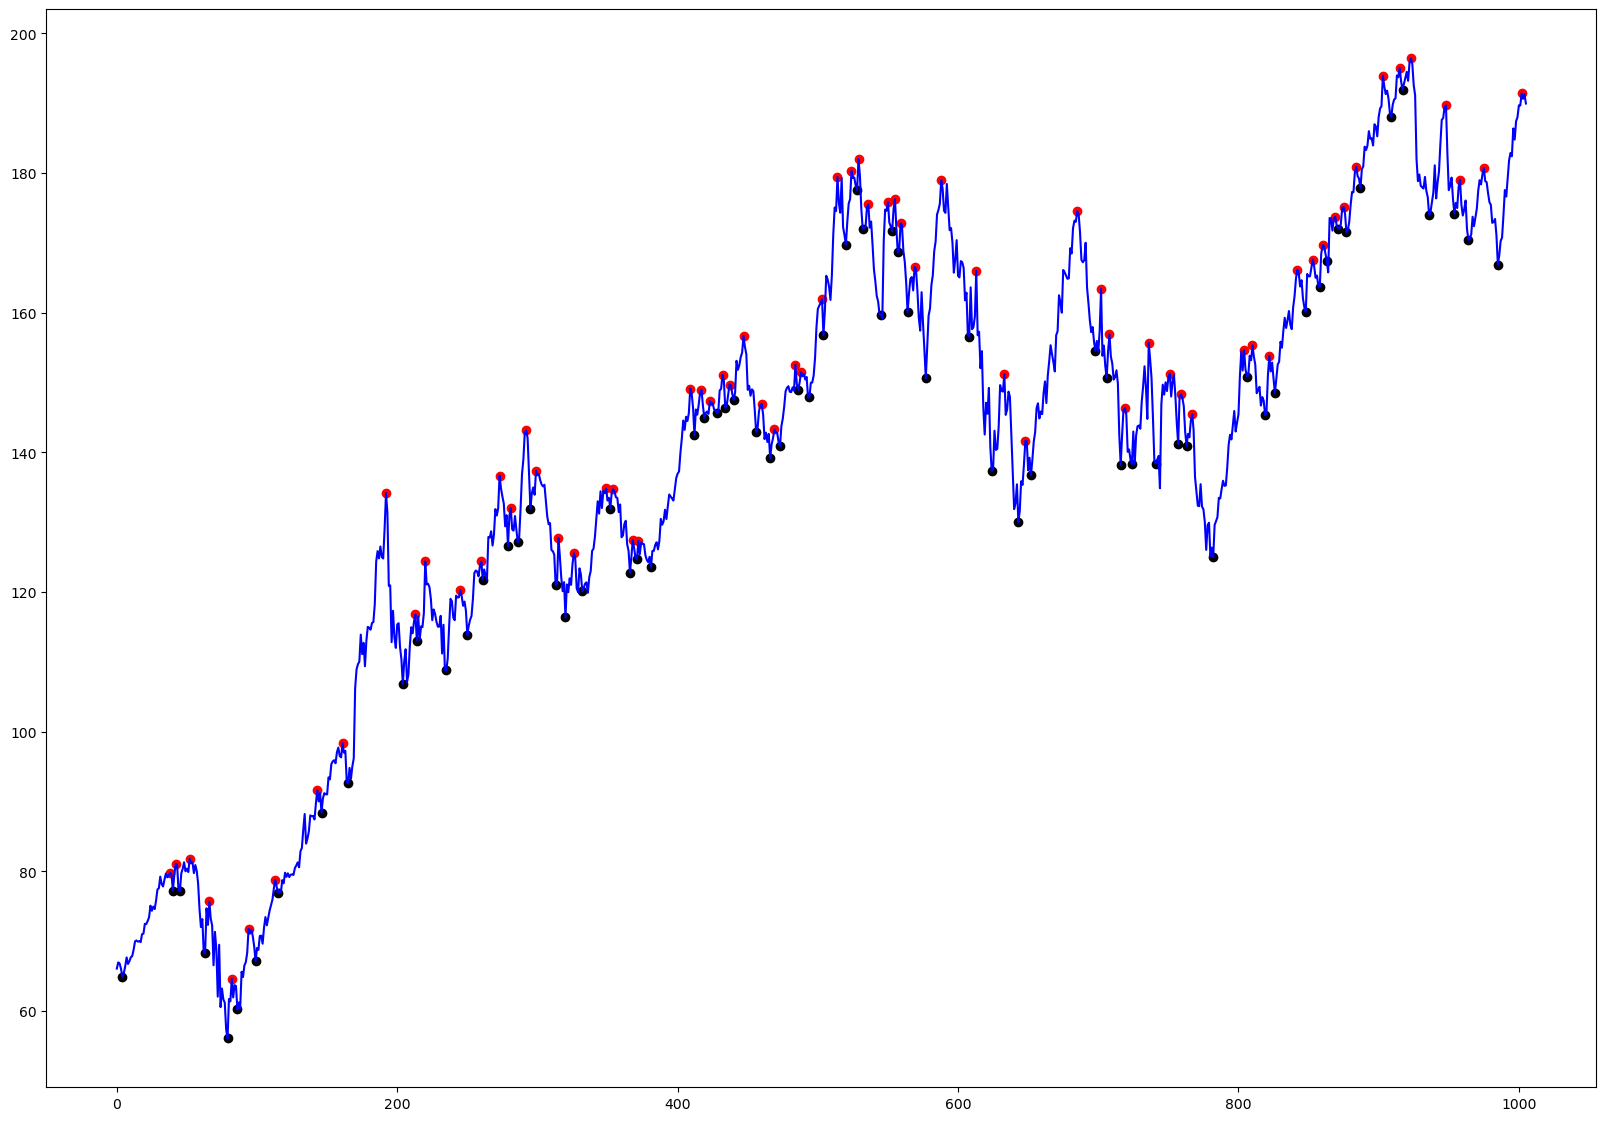

In [74]:
#====== grafica de una empresa, solo cambio de tendencia ======
tuplas = df_d2.query("companyName=='AAPL'")
tuplas2 = tuplas[['date','close']]
extrema, prices, smooth_extrema, smooth_prices, maxima, minima, fechas = find_extrema(tuplas2, bw=[1.5])

patterns = find_patterns(prices)

#print(prices)

for name, pattern_periods in patterns.items():
    print(f"{name}: {len(pattern_periods)} occurences")
   # print(pattern_periods)
    

#plot_window (prices, extrema, smooth_prices, smooth_extrema, ax=None)

fig = plt.figure(figsize=[20,14])
ax = fig.add_subplot(111)
#plt.subplot(121)
#plt.plot(highslows, color='green', label = 'close')


#plt.subplot(122)
plt.plot(prices, color='blue', label = 'close')
#ax.scatter(extrema.index, extrema.values, color='red')
ax.scatter(maxima.index, maxima.values, color='red')
ax.scatter(minima.index, minima.values, color='black')
#plt.scatter(highslows_sorted['date'],highslows_sorted['close'], color='red', marker = '*')

In [91]:
df_d2["pga01"] = df_d2["close_min"]
df_d2["open_sig"] = df_d2["open"].shift(-1) #apertura siguiente dia, para saber si es un GAP

In [92]:
df_d2

,high,low,open,close,volume,adjclose,date,companyName,SMA100,SMA200,close_min,close_max,pga01,open_sig,pga02,pga03
0,66.790001,65.625000,66.735001,66.072502,105207600,64.369934,2019-11-26,AAPL,NaN,NaN,NaN,NaN,NaN,66.394997,0,1
1,66.995003,66.327499,66.394997,66.959999,65235600,65.234573,2019-11-27,AAPL,NaN,NaN,NaN,NaN,NaN,66.650002,0,0
2,67.000000,66.474998,66.650002,66.812500,46617600,65.090866,2019-11-29,AAPL,NaN,NaN,NaN,NaN,NaN,66.817497,0,1
3,67.062500,65.862503,66.817497,66.040001,94487200,64.338280,2019-12-02,AAPL,NaN,NaN,NaN,NaN,NaN,64.577499,0,0
4,64.882500,64.072502,64.577499,64.862503,114430400,63.191113,2019-12-03,AAPL,NaN,NaN,64.862503,NaN,64.862503,65.267502,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2007,335.500000,329.350006,330.260010,335.040009,14494400,335.040009,2023-11-17,META,305.9802,264.00275,NaN,NaN,NaN,334.890015,0,0
2008,341.869995,334.190002,334.890015,339.970001,16960500,339.970001,2023-11-20,META,306.5646,264.76995,NaN,NaN,NaN,338.329987,0,0
2009,339.899994,335.899994,338.329987,336.980011,12027900,336.980011,2023-11-21,META,307.0646,265.52455,NaN,NaN,NaN,339.209991,0,1
2010,342.920013,338.579987,339.209991,341.489990,10702700,341.489990,2023-11-22,META,307.6193,266.27390,NaN,NaN,NaN,340.130005,0,0


In [93]:
#appl2["pga01"] = appl2["close_min"]
#pga02: cambio de tendencia alcista
def pga01(df_d2):
    if df_d2['close_min'] >0:
        return 1
    else:
        return 0
df_d2['pga01'] = df_d2.apply(pga01, axis=1)


In [94]:
#pga02: los precios estan en piso fuerte, cerca a los promedios moviles 100, 200
def pga02(df_d2):
    if df_d2['close_min'] - df_d2['SMA100']<=2 or df_d2['close_min'] - df_d2['SMA200']<=2 or df_d2['close_min']<df_d2['SMA100'] or df_d2['close_min']<df_d2['SMA200']:
        return 1
    else:
        return 0
df_d2['pga02'] = df_d2.apply(pga02, axis=1)

In [95]:
#pga03 La primera vela es GAP, apertura de manana esta mas arriba que el cierre de hoy y es verde
def pga03(df_d2):
    if df_d2['open_sig'] > df_d2['close']:
        return 1
    else:
        return 0
df_d2['pga03'] = df_d2.apply(pga03, axis=1)

In [96]:
df_d2.query("pga03==1")

,high,low,open,close,volume,adjclose,date,companyName,SMA100,SMA200,close_min,close_max,pga01,open_sig,pga02,pga03
0,66.790001,65.625000,66.735001,66.072502,105207600,64.369934,2019-11-26,AAPL,NaN,NaN,NaN,NaN,0,66.394997,0,1
2,67.000000,66.474998,66.650002,66.812500,46617600,65.090866,2019-11-29,AAPL,NaN,NaN,NaN,NaN,0,66.817497,0,1
4,64.882500,64.072502,64.577499,64.862503,114430400,63.191113,2019-12-03,AAPL,NaN,NaN,64.862503,NaN,1,65.267502,0,1
5,65.827499,65.169998,65.267502,65.434998,67181600,63.748890,2019-12-04,AAPL,NaN,NaN,NaN,NaN,0,65.947502,0,1
6,66.472504,65.682503,65.947502,66.394997,74424400,64.684135,2019-12-05,AAPL,NaN,NaN,NaN,NaN,0,66.870003,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1997,315.549988,311.019989,312.549988,314.600006,16754100,314.600006,2023-11-03,META,301.5343,255.16815,NaN,NaN,0,315.980011,0,1
1998,318.329987,314.450012,315.980011,315.799988,12887700,315.799988,2023-11-06,META,301.9588,256.05030,NaN,NaN,0,317.059998,0,1
2003,332.329987,325.700012,326.200012,329.190002,16908900,329.190002,2023-11-13,META,303.9931,260.50110,NaN,NaN,0,334.540009,0,1
2004,338.100006,333.329987,334.540009,336.309998,17179400,336.309998,2023-11-14,META,304.4689,261.44735,NaN,NaN,0,337.929993,0,1


In [97]:
#Nos quedamos con dataframe que solo cumpla las 3 condiciones
df_pga = df_d2[['companyName','date','open','close','open_sig','pga01','pga02', 'pga03']].query('pga02 == 1 and pga02 == 1 and pga03==1')
df_pga = df_pga.reset_index()
df_pga['id_posiblegpa'] = df_pga.index+1
df_pga.drop(columns='index')

,companyName,date,open,close,open_sig,pga01,pga02,pga03,id_posiblegpa
0,AAPL,2020-04-21,69.070000,67.092499,68.402496,1,1,1,1
1,AAPL,2020-11-02,109.110001,108.769997,109.660004,1,1,1,2
2,AAPL,2020-11-23,117.180000,113.849998,113.910004,1,1,1,3
3,AAPL,2021-02-25,124.680000,120.989998,122.589996,1,1,1,4
4,AAPL,2021-03-08,120.930000,116.360001,119.029999,1,1,1,5
5,AAPL,2021-05-12,123.400002,122.769997,124.580002,1,1,1,6
6,AAPL,2021-05-19,123.160004,124.690002,125.230003,1,1,1,7
7,AAPL,2021-06-03,124.680000,123.540001,124.070000,1,1,1,8
8,AAPL,2021-10-04,141.759995,139.139999,139.490005,1,1,1,9
9,AAPL,2021-10-13,141.240005,140.910004,142.110001,1,1,1,10


In [98]:
print(df_pga.shape[0]) #cantidad de casos
print(df_d.shape[0])
print(df_d2.shape[0]) # cantidad total de dias


43
2012
2012


In [99]:
# =====Se identifica los siguientes dias que cerro con vela verde======
id_new = 1
df_pga2 = df_d2[['companyName','date','open', 'close']].query('open<=close and 1<0')  

for i in df_pga.index:
    print("index:",i, "fecha:", df_pga['date'][i])
    j=0
    fec_today = df_pga['date'][i]
    companyName = df_pga['companyName'][i]
    fec_tomorrow = fec_today + pd.DateOffset(days=1)
    k=0
    while j<=0:              
        if fec_tomorrow.date()<= today:
            j=0
        else:
            j=1            
        #1 verificar si existe el dia
        tupla_new1 = df_d2[['companyName','date','open', 'close']].query('companyName==@companyName and date == @fec_tomorrow')
        if len(tupla_new1.index)>0:
            #2 revisamos si el dia fue vela alcista
            tupla_new2 = df_d2[['companyName','date','open', 'close']].query('companyName==@companyName and date == @fec_tomorrow and open<=close')    
            tupla_new2['id_posiblegpa']=id_new            
            if k==0:
                tupla_new2['id_inidia']=1
            else:
                tupla_new2['id_inidia']=0
            tupla_new2['id_ultdia']=0            
            if len(tupla_new2.index)>0:
                if len(df_d2.index)==0:                    
                    df_d2 = tupla_new2
                else:
                    #appl_pga2 = appl_pga2.append(tupla_new2)
                    #appl_pga2 = pd.concat([appl_pga2, pd.DataFrame([tupla_new2])], ignore_index=True)
                    #appl_pga2.loc[len(appl_pga2)] = tupla_new2
                    df_pga2 = pd.concat([df_pga2, tupla_new2],ignore_index=True)                    
                fec_tomorrow = fec_tomorrow + pd.DateOffset(days=1)
                k=1
                
            else:                
                #Se agrega el dia en que se perdio la subida (ultimo dia)
                tupla_new2 = df_d2[['companyName','date','open', 'close']].query('companyName==@companyName and date == @fec_tomorrow')
                tupla_new2['id_posiblegpa'] = id_new
                if k==0:
                    tupla_new2['id_inidia']=1
                else:
                    tupla_new2['id_inidia']=0
                
                tupla_new2['id_ultdia']=1
                
                df_pga2 = pd.concat([df_pga2, tupla_new2],ignore_index=True) 
                j=1
                k=1
                id_new+= int(1)
        else:         
            fec_tomorrow = fec_tomorrow + pd.DateOffset(days=1)


index: 0 fecha: 2020-04-21 00:00:00
index: 1 fecha: 2020-11-02 00:00:00
index: 2 fecha: 2020-11-23 00:00:00
index: 3 fecha: 2021-02-25 00:00:00
index: 4 fecha: 2021-03-08 00:00:00
index: 5 fecha: 2021-05-12 00:00:00
index: 6 fecha: 2021-05-19 00:00:00
index: 7 fecha: 2021-06-03 00:00:00
index: 8 fecha: 2021-10-04 00:00:00
index: 9 fecha: 2021-10-13 00:00:00
index: 10 fecha: 2021-11-11 00:00:00
index: 11 fecha: 2022-01-26 00:00:00
index: 12 fecha: 2022-03-14 00:00:00
index: 13 fecha: 2022-04-27 00:00:00
index: 14 fecha: 2022-05-19 00:00:00
index: 15 fecha: 2022-06-16 00:00:00
index: 16 fecha: 2022-09-06 00:00:00
index: 17 fecha: 2022-09-30 00:00:00
index: 18 fecha: 2022-11-29 00:00:00
index: 19 fecha: 2022-12-07 00:00:00
index: 20 fecha: 2023-01-05 00:00:00
index: 21 fecha: 2023-10-26 00:00:00
index: 22 fecha: 2021-01-14 00:00:00
index: 23 fecha: 2021-01-29 00:00:00
index: 24 fecha: 2021-03-03 00:00:00
index: 25 fecha: 2021-10-12 00:00:00
index: 26 fecha: 2021-10-27 00:00:00
index: 27 f

In [29]:
df_d2.query("date>='2021-02-21' and date<='2021-02-27'")

,high,low,open,close,volume,adjclose,date,companyName,SMA100,SMA200,close_min,close_max,pga01,open_sig,pga02,pga03
310,129.720001,125.599998,128.009995,126.000000,103916400,123.998344,2021-02-22,AAPL,124.612400,111.857400,NaN,NaN,0,123.760002,0,0
311,126.709999,118.389999,123.760002,125.860001,158273000,123.860580,2021-02-23,AAPL,124.730100,112.107025,NaN,NaN,0,124.940002,0,0
312,125.559998,122.230003,124.940002,125.349998,111039900,123.358681,2021-02-24,AAPL,124.825500,112.346112,NaN,NaN,0,124.680000,0,0
313,126.459999,120.540001,124.680000,120.989998,148199500,119.067940,2021-02-25,AAPL,124.867500,112.557300,120.989998,NaN,1,122.589996,1,1
314,124.849998,121.199997,122.589996,121.260002,164560400,119.333656,2021-02-26,AAPL,124.949900,112.774337,NaN,NaN,0,123.750000,0,0
1316,263.070007,257.529999,257.950012,260.329987,17434900,260.329987,2021-02-22,META,271.142000,258.540950,NaN,NaN,0,259.500000,0,0
1317,267.459991,254.960007,259.500000,265.859985,21924600,265.859985,2021-02-23,META,271.182699,258.813950,NaN,NaN,0,262.329987,0,0
1318,266.380005,258.390015,262.329987,264.309998,15736100,264.309998,2021-02-24,META,271.206799,259.073750,NaN,NaN,0,262.299988,0,0
1319,266.940002,254.039993,262.299988,254.690002,19053100,254.690002,2021-02-25,META,271.087399,259.281300,NaN,NaN,0,256.470001,0,0
1320,265.549988,256.470001,256.470001,257.619995,26619500,257.619995,2021-02-26,META,271.064199,259.518900,NaN,NaN,0,260.820007,0,0


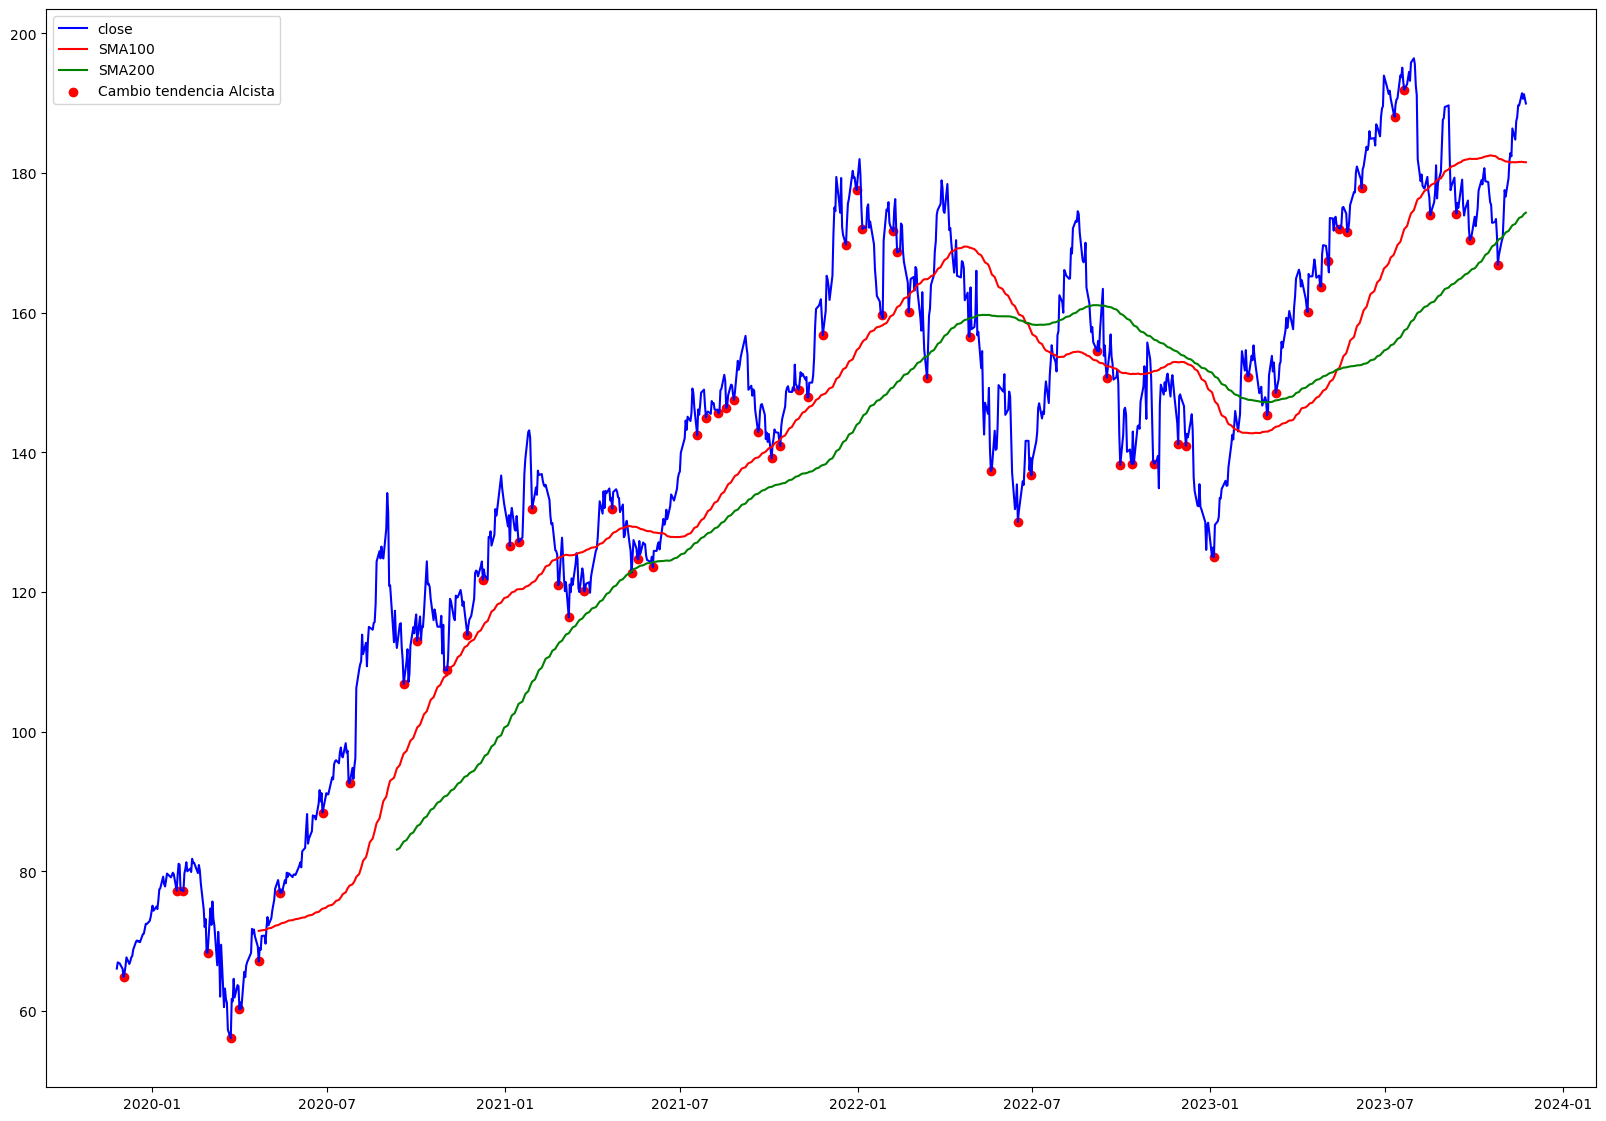

In [100]:
# grafico de cambios al alza, con promedios SMA100, SMA200, Para visualizar zonas baratas
fig = plt.figure(figsize=[20,14])
ax = fig.add_subplot(111)
#plt.subplot(121)
#plt.plot(highslows, color='green', label = 'close')
#plt.subplot(122)
plt.plot(df_d2.query("companyName=='AAPL'")['date'], df_d2.query("companyName=='AAPL'")['close'], color='blue', label = 'close')
plt.plot(df_d2.query("companyName=='AAPL'")['date'], df_d2.query("companyName=='AAPL'")['SMA100'], color='red', label = 'SMA100')
plt.plot(df_d2.query("companyName=='AAPL'")['date'], df_d2.query("companyName=='AAPL'")['SMA200'], color='green', label = 'SMA200')
ax.scatter(df_d2.query("companyName=='AAPL'")['date'], df_d2.query("companyName=='AAPL'")['close_min'], color='red', label = 'Cambio tendencia Alcista')
plt.legend(loc="upper left")

In [101]:
df_d2.head(50)

,high,low,open,close,volume,adjclose,date,companyName,SMA100,SMA200,close_min,close_max,pga01,open_sig,pga02,pga03
0,66.790001,65.625000,66.735001,66.072502,105207600,64.369934,2019-11-26,AAPL,NaN,NaN,NaN,NaN,0,66.394997,0,1
1,66.995003,66.327499,66.394997,66.959999,65235600,65.234573,2019-11-27,AAPL,NaN,NaN,NaN,NaN,0,66.650002,0,0
2,67.000000,66.474998,66.650002,66.812500,46617600,65.090866,2019-11-29,AAPL,NaN,NaN,NaN,NaN,0,66.817497,0,1
3,67.062500,65.862503,66.817497,66.040001,94487200,64.338280,2019-12-02,AAPL,NaN,NaN,NaN,NaN,0,64.577499,0,0
4,64.882500,64.072502,64.577499,64.862503,114430400,63.191113,2019-12-03,AAPL,NaN,NaN,64.862503,NaN,1,65.267502,0,1
5,65.827499,65.169998,65.267502,65.434998,67181600,63.748890,2019-12-04,AAPL,NaN,NaN,NaN,NaN,0,65.947502,0,1
6,66.472504,65.682503,65.947502,66.394997,74424400,64.684135,2019-12-05,AAPL,NaN,NaN,NaN,NaN,0,66.870003,0,1
7,67.750000,66.824997,66.870003,67.677498,106075600,65.933594,2019-12-06,AAPL,NaN,NaN,NaN,NaN,0,67.500000,0,0
8,67.699997,66.227501,67.500000,66.730003,128042400,65.010513,2019-12-09,AAPL,NaN,NaN,NaN,NaN,0,67.150002,0,1
9,67.517502,66.464996,67.150002,67.120003,90420400,65.390450,2019-12-10,AAPL,NaN,NaN,NaN,NaN,0,67.202499,0,1


In [102]:
##descarga de dataframe HORA
df_h = pd.DataFrame()
for ticker in tickers:
    company = yf.download(ticker, start = ini2_str, end = today_str, interval='60m')
    ## cambio de nombre de las columnas
    company.rename(columns={'Datetime':'datetime','Open':'open','High':'high','Low':'low','Close':'close','Adj Close':'adj close','Volume':'volume'}, inplace = True)
    company['date'] = pd.to_datetime (company.index.date)
    company['datetime'] = pd.to_datetime (company.index)    
    company['companyName'] = ticker
    df_h = pd.concat([df_h, company],ignore_index=True) 
    
'''
appl_hor = yf.download("AAPL, META", start = ini2_str, end = today_str, interval='60m')
## cambio de nombre de las columnas
appl_hor.rename(columns={'Datetime':'datetime','Open':'open','High':'high','Low':'low','Close':'close','Adj Close':'adj close','Volume':'volume'}, inplace = True)
appl_hor['date'] = pd.to_datetime (appl_hor.index.date)
appl_hor['datetime'] = pd.to_datetime (appl_hor.index)
'''

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


'\nappl_hor = yf.download("AAPL, META", start = ini2_str, end = today_str, interval=\'60m\')\n## cambio de nombre de las columnas\nappl_hor.rename(columns={\'Datetime\':\'datetime\',\'Open\':\'open\',\'High\':\'high\',\'Low\':\'low\',\'Close\':\'close\',\'Adj Close\':\'adj close\',\'Volume\':\'volume\'}, inplace = True)\nappl_hor[\'date\'] = pd.to_datetime (appl_hor.index.date)\nappl_hor[\'datetime\'] = pd.to_datetime (appl_hor.index)\n'

In [103]:
df_h.query("companyName=='META'")

,open,high,low,close,adj close,volume,date,datetime,companyName
3499,335.440002,337.619995,333.500000,335.100006,335.100006,4514340,2021-11-26,2021-11-26 09:30:00,META
3500,335.049988,335.279999,331.902008,333.779999,333.779999,2245103,2021-11-26,2021-11-26 10:30:00,META
3501,333.801392,335.362091,333.480011,335.040009,335.040009,2056425,2021-11-26,2021-11-26 11:30:00,META
3502,336.890015,339.279999,335.510010,337.124298,337.124298,4023411,2021-11-29,2021-11-29 09:30:00,META
3503,337.100006,337.760010,335.304993,336.559998,336.559998,2026239,2021-11-29,2021-11-29 10:30:00,META
...,...,...,...,...,...,...,...,...,...
6993,341.019989,341.779999,341.000000,341.459991,341.459991,912116,2023-11-22,2023-11-22 15:30:00,META
6994,340.130005,341.855591,338.610413,338.850006,338.850006,1891585,2023-11-24,2023-11-24 09:30:00,META
6995,338.890015,338.945007,336.769989,337.638000,337.638000,1385045,2023-11-24,2023-11-24 10:30:00,META
6996,337.700012,337.970001,337.281006,337.510010,337.510010,832074,2023-11-24,2023-11-24 11:30:00,META


In [34]:
#df_minval = pd.DataFrame()
#df_minval=df_h2.groupby('grupo').cumcount() + 1 df_h2[['companyName', 'date']].groupby('date').min()
#df_minval['date'] = df_minval.index
#df_minval.reset_index(inplace=True)
#df_minval
#df_pga3 = pd.merge(df_pga2, df_minval, on=['companyName','date'], how='inner') 

In [104]:
#agregamos columna de id_posiblegpa y id_ultdia que determina los dias de subida
df_h2 = pd.merge(df_h[['companyName','open','close','volume', 'datetime','date']], df_pga2[['companyName','date','id_posiblegpa','id_inidia', 'id_ultdia']], on = ['companyName','date'], how='left')
#Cierre anterior

In [155]:
#df_h2.query("id_posiblegpa==19 and companyName=='AAPL'").head(50)
#df_pga2.query("id_posiblegpa==15 and companyName=='AAPL'").head(50)

#appl_hor2.groupby('id_posiblegpa').count()
#appl_hor2['RN'] = appl_hor2.sort_values(['datetime'], ascending=[True]).groupby(['id_posiblegpa','date']).cumcount() + 1
#appl_hor2.query('id_posiblegpa==11')

#df_h.query("companyName=='AAPL' and date<='2021-11-15'").head(50)

#appl_hor2.dtypes
df_pga2


,companyName,date,open,close,id_posiblegpa,id_inidia,id_ultdia
0,AAPL,2020-04-22,68.402496,69.025002,1.0,1.0,0.0
1,AAPL,2020-04-23,68.967499,68.757500,1.0,0.0,1.0
2,AAPL,2020-11-03,109.660004,110.440002,2.0,1.0,0.0
3,AAPL,2020-11-04,114.139999,114.949997,2.0,0.0,0.0
4,AAPL,2020-11-05,117.949997,119.029999,2.0,0.0,0.0
...,...,...,...,...,...,...,...
136,META,2023-01-03,122.820000,124.739998,42.0,0.0,0.0
137,META,2023-01-04,127.379997,127.370003,42.0,0.0,1.0
138,META,2023-10-27,294.480011,296.730011,43.0,1.0,0.0
139,META,2023-10-30,299.089996,302.660004,43.0,0.0,0.0


In [106]:
#df_h2.query("id_posiblegpa>0").head(50)
#df_h2.query("id_posiblegpa==20").head(50)
#df_h2.query("companyName=='META' and id_posiblegpa>0").head(50)
df_h2.query("id_posiblegpa==17").head(50)
#df_pga2.groupby(['companyName','id_posiblegpa']).count()
#df_h2.query("id_posiblegpa>0").head(50)

,companyName,open,close,volume,datetime,date,id_posiblegpa,id_inidia,id_ultdia
1361,AAPL,154.824997,154.570007,18254813,2022-09-07 09:30:00,2022-09-07,17.0,1.0,0.0
1362,AAPL,154.580002,154.895004,11382662,2022-09-07 10:30:00,2022-09-07,17.0,1.0,0.0
1363,AAPL,154.895004,154.500000,6811226,2022-09-07 11:30:00,2022-09-07,17.0,1.0,0.0
1364,AAPL,154.490005,154.613098,8339653,2022-09-07 12:30:00,2022-09-07,17.0,1.0,0.0
1365,AAPL,154.619995,155.634995,12329648,2022-09-07 13:30:00,2022-09-07,17.0,1.0,0.0
1366,AAPL,155.609406,156.607407,14494268,2022-09-07 14:30:00,2022-09-07,17.0,1.0,0.0
1367,AAPL,156.600006,155.919998,7613589,2022-09-07 15:30:00,2022-09-07,17.0,1.0,0.0
1368,AAPL,154.639999,154.919998,20423405,2022-09-08 09:30:00,2022-09-08,17.0,0.0,1.0
1369,AAPL,154.910004,155.990005,9445752,2022-09-08 10:30:00,2022-09-08,17.0,0.0,1.0
1370,AAPL,155.985001,153.119904,12258999,2022-09-08 11:30:00,2022-09-08,17.0,0.0,1.0


In [174]:
#df_pga2.query("id_posiblegpa==2")
#df_pga2
df_eval

,companyName,open,close,volume,datetime,date,id_posiblegpa,id_inidia,id_ultdia,hora
290,AAPL,162.449997,162.610001,22055743,2022-01-27 09:30:00,2022-01-27,12.0,1.0,1.0,9
291,AAPL,162.589996,162.330002,12959035,2022-01-27 10:30:00,2022-01-27,12.0,1.0,1.0,10
292,AAPL,162.339996,161.144608,11838250,2022-01-27 11:30:00,2022-01-27,12.0,1.0,1.0,11
293,AAPL,161.139999,158.779999,14016024,2022-01-27 12:30:00,2022-01-27,12.0,1.0,1.0,12
294,AAPL,158.770004,159.070007,12651871,2022-01-27 13:30:00,2022-01-27,12.0,1.0,1.0,13
...,...,...,...,...,...,...,...,...,...,...
6877,META,299.299988,301.089996,1568826,2023-10-31 11:30:00,2023-10-31,43.0,0.0,1.0,11
6878,META,301.089905,300.070007,1465088,2023-10-31 12:30:00,2023-10-31,43.0,0.0,1.0,12
6879,META,300.125000,299.799988,1603445,2023-10-31 13:30:00,2023-10-31,43.0,0.0,1.0,13
6880,META,299.875000,300.140015,2022842,2023-10-31 14:30:00,2023-10-31,43.0,0.0,1.0,14


In [193]:
# =====Se identifica el ultimo registro en hora, donde cerro en verde======
# =====el primer registro del bloque tiene que ser un GAP y vela verde======
# ===== la vela inicial de todos los dias, debe de ser verde, si no lo es, cortar =====

#solo datadrame de los registros de primer dia
df_pga3 = df_pga2.query("id_inidia==1")

df_eval = df_h2[['companyName','open','close','volume','datetime','date','id_posiblegpa', 'id_inidia','id_ultdia']].query('id_posiblegpa>0')
df_h3 = df_h2[['companyName','open','close','volume','datetime','date','id_posiblegpa', 'id_inidia','id_ultdia']].query('open<=close and 1<0')  
df_eval['hora'] = df_eval['datetime'].dt.hour

#recorrer df_pga2, datos a nivel de dia
for index, row in df_pga3.iterrows():
    print("index:",index, "fecha:", row['date'], "companyName:", row['companyName'], "id_posiblegpa:", row['id_posiblegpa'])
    companyName = row['companyName']
    id_posiblegpa = row['id_posiblegpa']
    id_firstvelabloque = 0
    # primera tupla del bloque debe de ser verde y GAP
    tupla0 = df_eval.query("companyName==@companyName and id_inidia==1 and hora==9 and id_posiblegpa==@id_posiblegpa and open<=close")
    if (len(tupla0.index)>0):
        id_firstvelabloque =1
    else:
        id_firstvelabloque =0
    
    if id_firstvelabloque ==1:
        id_firstveladayverde = 0
        #verificar que cada dia inicie con vela verde, recorrer por id posible gpa
        tupla1 = df_eval.query("companyName==@companyName and id_posiblegpa==@id_posiblegpa")
        for index1, row1 in tupla1.iterrows():
            fec_date = row1['date']
            r1 = pd.DataFrame ({"companyName" : [row1['companyName']], "open" : [row1['open']], "close" : [row1['close']], "volume" : [row1['volume']], "datetime" : [row1['datetime']], "date" : [row1['date']], "id_posiblegpa" : [row1['id_posiblegpa']], "id_inidia" : [row1['id_inidia']], "id_ultdia" : [row1['id_ultdia']]})
            tupla2 = tupla1.query("date==@fec_date and hora==9 and open<=close")
            if (len(tupla2.index)>0):
                id_firstveladayverde=1
            else:
                id_firstveladayverde=0
            
            if id_firstveladayverde==1:
                #tupla3 = tupla1.query("date==@fec_date")
                df_h3 = pd.concat([df_h3, r1],ignore_index=True)
                
                
    
'''for index, row in df_eval.iterrows():
    id_firstvelabloque = 0

    id_firstveladay = 0
    id_posiblegpa = row['id_posiblegpa']
    fec_date = row['date']
    
    fec_datetime = pd.to_datetime(row['datetime'])
    companyName = row['companyName']
    
    tupla0 = df_eval.query("companyName==@companyName and id_inidia==1 and hora==9 and id_posiblegpa==@id_posiblegpa and open<=close")
    if (len(tupla0.index)>0):
        id_firstvelabloque =1
    else:
        id_firstvelabloque =0
    
    if id_firstvelabloque ==1:
        #primera vela 
        tupla1 = df_eval.query("companyName==@companyName and date==@fec_date and hora==9 and close>open")
        if (len(tupla1.index)>0):
            id_firstveladay=1
        else:
            id_firstveladay=0

        tupla = pd.DataFrame ({"companyName" : [row['companyName']], "open" : [row['open']], "close" : [row['close']], "volume" : [row['volume']], "datetime" : [row['datetime']], "date" : [row['date']], "id_posiblegpa" : [row['id_posiblegpa']], "id_ultdia" : [row['id_ultdia']], "id_inidia" : [row['id_inidia']]})

        if id_firstveladay==1:            
            if row['id_ultdia']==0:
                #print("hito0")
                df_h3 = pd.concat([df_h3, tupla],ignore_index=True)  
            else: 
                def_eval2 = df_eval[(df_eval['companyName'] == companyName) & (df_eval['datetime'] <= fec_datetime) & (df_eval['id_ultdia']==1) & (df_eval['date']==fec_date) & (df_eval['open']>=df_eval['close'])]
                #print (def_eval2)
                #print (len(def_eval2.index))
                open1 = float(row['open'])
                close1 = float(row['close'])
                if (open1>=close1) or len(def_eval2.index)>0:
                    #print("hito1")
                    tupla['id_posiblegpa'] = 0
                    df_h3 = pd.concat([df_h3, tupla],ignore_index=True)        
                else:
                    #print("hito2")
                    df_h3 = pd.concat([df_h3, tupla],ignore_index=True)        
                #print(len (appl_hor3.index))'''

index: 0 fecha: 2020-04-22 00:00:00 companyName: AAPL id_posiblegpa: 1.0
index: 2 fecha: 2020-11-03 00:00:00 companyName: AAPL id_posiblegpa: 2.0
index: 7 fecha: 2020-11-24 00:00:00 companyName: AAPL id_posiblegpa: 3.0
index: 14 fecha: 2021-02-26 00:00:00 companyName: AAPL id_posiblegpa: 4.0
index: 15 fecha: 2021-03-09 00:00:00 companyName: AAPL id_posiblegpa: 5.0
index: 17 fecha: 2021-05-13 00:00:00 companyName: AAPL id_posiblegpa: 6.0
index: 20 fecha: 2021-05-20 00:00:00 companyName: AAPL id_posiblegpa: 7.0
index: 22 fecha: 2021-06-04 00:00:00 companyName: AAPL id_posiblegpa: 8.0
index: 24 fecha: 2021-10-05 00:00:00 companyName: AAPL id_posiblegpa: 9.0
index: 28 fecha: 2021-10-14 00:00:00 companyName: AAPL id_posiblegpa: 10.0
index: 35 fecha: 2021-11-12 00:00:00 companyName: AAPL id_posiblegpa: 11.0
index: 37 fecha: 2022-01-27 00:00:00 companyName: AAPL id_posiblegpa: 12.0
index: 38 fecha: 2022-03-15 00:00:00 companyName: AAPL id_posiblegpa: 13.0
index: 50 fecha: 2022-04-28 00:00:00 

'for index, row in df_eval.iterrows():\n    id_firstvelabloque = 0\n\n    id_firstveladay = 0\n    id_posiblegpa = row[\'id_posiblegpa\']\n    fec_date = row[\'date\']\n    \n    fec_datetime = pd.to_datetime(row[\'datetime\'])\n    companyName = row[\'companyName\']\n    \n    tupla0 = df_eval.query("companyName==@companyName and id_inidia==1 and hora==9 and id_posiblegpa==@id_posiblegpa and open<=close")\n    if (len(tupla0.index)>0):\n        id_firstvelabloque =1\n    else:\n        id_firstvelabloque =0\n    \n    if id_firstvelabloque ==1:\n        #primera vela \n        tupla1 = df_eval.query("companyName==@companyName and date==@fec_date and hora==9 and close>open")\n        if (len(tupla1.index)>0):\n            id_firstveladay=1\n        else:\n            id_firstveladay=0\n\n        tupla = pd.DataFrame ({"companyName" : [row[\'companyName\']], "open" : [row[\'open\']], "close" : [row[\'close\']], "volume" : [row[\'volume\']], "datetime" : [row[\'datetime\']], "date" : [ro

In [218]:
df_h3.query("id_posiblegpa==19")


,companyName,open,close,volume,datetime,date,id_posiblegpa,id_inidia,id_ultdia
133,AAPL,141.395004,141.500000,14716115,2022-11-30 09:30:00,2022-11-30,19.0,1.0,0.0
134,AAPL,141.509995,141.789993,7634251,2022-11-30 10:30:00,2022-11-30,19.0,1.0,0.0
135,AAPL,141.789993,140.919998,5848332,2022-11-30 11:30:00,2022-11-30,19.0,1.0,0.0
136,AAPL,140.910004,141.559998,5078997,2022-11-30 12:30:00,2022-11-30,19.0,1.0,0.0
137,AAPL,141.554993,146.294296,19177034,2022-11-30 13:30:00,2022-11-30,19.0,1.0,0.0
138,AAPL,146.287598,147.080002,12567179,2022-11-30 14:30:00,2022-11-30,19.0,1.0,0.0
139,AAPL,147.074997,148.029999,14139009,2022-11-30 15:30:00,2022-11-30,19.0,1.0,0.0
140,AAPL,145.960007,146.229996,14383952,2022-12-02 09:30:00,2022-12-02,19.0,0.0,0.0
141,AAPL,146.229904,146.460007,8250888,2022-12-02 10:30:00,2022-12-02,19.0,0.0,0.0
142,AAPL,146.464996,146.449905,7321868,2022-12-02 11:30:00,2022-12-02,19.0,0.0,0.0


In [44]:
# Actualizamos dataframe quedandonos hasta donde quedo la subida
df_h3=df_h3.query("id_posiblegpa>0")

In [40]:
#appl_hor2.dtypes
df_h3['hora'] = df_h3['datetime'].dt.hour

### volumen en hora por empresa, se promedia el volumen por empresa y lo guardamos en un DataFrame
df_promVol= df_h[['companyName', 'volume']].groupby('companyName').mean()
df_promVol['volume'] = df_promVol['volume'].astype(float)
#df_promVol['companyName'] = df_promVol.index
df_promVol = df_promVol.reset_index()

In [41]:
df_promVol

,companyName,volume
0,AAPL,9.403224e+06
1,META,3.851538e+06


In [42]:
#pga04: La primera vela es verde
def pga04(df_h3):
    if df_h3['id_posiblegpa']>0 and df_h3['open']<=df_h3['close'] and df_h3['hora']==9:
        return 1
    else:
        return 0
df_h3['pga04'] = df_h3.apply(pga04, axis=1)


#pga05: Una de las velas tiene que tener volumen (mas que promedio), evaluacion solo en el primer dia
def pga05(df_h3):    
    company = df_h3['companyName']
    tupla = df_promVol.query("companyName==@company")
    prom_vol = sum(tupla['volume'])
    if df_h3['volume']>prom_vol and df_h3['id_inidia']==1:
        return 1
    else:
        return 0
df_h3['pga05'] = df_h3.apply(pga05, axis=1)

#pga06: La vela de apertura del proximo dia es verde
def pga06(df_h3):
    if df_h3['id_posiblegpa']>0 and df_h3['open']<=df_h3['close'] and df_h3['hora']==9:
        return 1
    else:
        return 0
df_h3['pga06'] = df_h3.apply(pga06, axis=1)

In [43]:
#df_h.query("companyName=='AAPL'")['volume'].mean()
#df_promVol
#print(tickers)
#df_h3.query("id_posiblegpa==19")
#df_dias.query("companyName=='META'")

#df_h3.query("companyName=='AAPL'").head(50)
df_h3.query("companyName=='AAPL' and id_posiblegpa==12")

,companyName,open,close,volume,datetime,date,id_posiblegpa,id_inidia,id_ultdia,hora,pga04,pga05
0,AAPL,162.449997,162.610001,22055743,2022-01-27 09:30:00,2022-01-27,12.0,1.0,1.0,9,1,1


In [44]:
# reiniciar id_posiblegpga
df_minval = pd.DataFrame()
df_minval=df_h3[['companyName', 'id_posiblegpa']].groupby('companyName').min()
#df_minval['id_posiblegpa'] = df_minval.index
df_minval.reset_index(inplace=True)


#reini: reiniciar casos trading
def id_posiblegpa2(df_h3):    
    company = df_h3['companyName']
    tupla = df_minval.query("companyName==@company")
    num = df_h3['id_posiblegpa'] - min(tupla['id_posiblegpa']) + 1
    return num
df_h3['id_posiblegpa2'] = df_h3.apply(id_posiblegpa2, axis=1)



df_h3['id_posiblegpa'] = df_h3['id_posiblegpa2']
del df_h3['id_posiblegpa2']

In [45]:
# efectividad: si tuvo mas de un dia de alza
df_diasunicos = df_h3[['companyName','id_posiblegpa','date']].drop_duplicates()

#id efectividad: indicador de efectivodad
def id_efectividad(df_h3):    
    company = df_h3['companyName']
    id_posiblegpa = df_h3['id_posiblegpa']
    tupla = df_diasunicos.query("companyName==@company and id_posiblegpa==@id_posiblegpa")
    if len(tupla)>1:
        cant=1
    else:
        cant=0
    return cant
df_h3['id_efectividad'] = df_h3.apply(id_efectividad, axis=1)


#cantidad dias subio
def id_efectividad(df_h3):    
    company = df_h3['companyName']
    id_posiblegpa = df_h3['id_posiblegpa']
    tupla = df_diasunicos.query("companyName==@company and id_posiblegpa==@id_posiblegpa")
    cant=len(tupla)
    return cant
df_h3['cnt_diassubio'] = df_h3.apply(id_efectividad, axis=1)


In [46]:
df_h3.query("id_posiblegpa==10 and companyName=='AAPL'")

,companyName,open,close,volume,datetime,date,id_posiblegpa,id_inidia,id_ultdia,hora,pga04,pga05,id_efectividad,cnt_diassubio
238,AAPL,126.010002,126.375000,21496694,2023-01-06 09:30:00,2023-01-06,10.0,1.0,0.0,9,1,1,1,2
239,AAPL,126.375000,127.245003,10581541,2023-01-06 10:30:00,2023-01-06,10.0,1.0,0.0,10,0,1,1,2
240,AAPL,127.250000,128.329895,8905736,2023-01-06 11:30:00,2023-01-06,10.0,1.0,0.0,11,0,0,1,2
241,AAPL,128.321701,128.250000,6641033,2023-01-06 12:30:00,2023-01-06,10.0,1.0,0.0,12,0,0,1,2
242,AAPL,128.240005,129.335007,8218980,2023-01-06 13:30:00,2023-01-06,10.0,1.0,0.0,13,0,0,1,2
243,AAPL,129.339996,129.809998,10559575,2023-01-06 14:30:00,2023-01-06,10.0,1.0,0.0,14,0,1,1,2
244,AAPL,129.815002,129.520004,9922349,2023-01-06 15:30:00,2023-01-06,10.0,1.0,0.0,15,0,1,1,2
245,AAPL,130.464996,132.565002,18383099,2023-01-09 09:30:00,2023-01-09,10.0,0.0,1.0,9,1,0,1,2
246,AAPL,132.574997,133.085007,10329185,2023-01-09 10:30:00,2023-01-09,10.0,0.0,1.0,10,0,0,1,2


In [47]:
#pd.unique(appl_hor3['id_posiblegpa'])
#specify path for export

import os

path = r'C:\Users\carlo\OneDrive\Documentos\TRADER\result\pga_h.txt'

# check whether the file exists
if os.path.exists(path):
    # delete the file
    os.remove(path)
else:
    # if the file does not exist.
    print("File does not exists. File needs to be created.")

#export DataFrame to text file
with open(path, 'a') as f:
    #df_string = appl_hor3.to_string(header=True, index=False, sep ='\t')
    df_h3.to_csv(path, header=True, index=None, sep='\t', mode='w')
    #f.write(df_string)